In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import random
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

In [84]:
dataSetAgua = pd.read_csv("consumo_agua_historico_2019.csv")
dataSetAgua.describe()

,anio,bimestre,consumo_total_mixto,consumo_prom_dom,consumo_total_dom,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,consumo_total_no_dom,latitud,longitud
count,71100.0,71100.000000,62773.000000,66280.000000,66280.000000,62773.000000,71100.000000,71100.000000,71100.000000,71100.000000,71100.000000,71100.000000
mean,2019.0,2.006793,174.365484,29.133265,1186.299407,50.637847,1692.563310,110.109989,125.653199,432.740960,19.392268,-99.132895
std,0.0,0.814396,312.667028,64.566701,2771.072454,130.410438,3501.414456,1049.390116,1075.769887,2031.968078,0.070546,0.057891
min,2019.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.135867,-99.337703
25%,2019.0,1.000000,0.000000,18.691274,161.650000,0.000000,340.950000,23.010000,6.273750,10.980000,19.344073,-99.172484
50%,2019.0,2.000000,79.940000,26.414365,604.245000,33.452000,896.105000,31.692994,19.280000,54.035000,19.392910,-99.135196
75%,2019.0,3.000000,233.330000,36.246875,1261.455000,61.221667,1808.745000,45.483434,54.171875,230.385000,19.446807,-99.096630
max,2019.0,3.000000,23404.440000,7796.410000,95060.690000,11702.220000,101035.000000,89691.773438,89691.773438,101035.000000,19.579103,-98.950469


In [85]:
listaConsumoTotal = dataSetAgua["consumo_total"].tolist() # Vaiable Independiente, Lista del consumo total de cada delegacion

listaColonias = dataSetAgua["colonia"].tolist() #Lista colonias
listaAlcaldias = dataSetAgua['alcaldia'].tolist() #Lista Alcaldias

cantConsumidaMaxMin = np.array(listaConsumoTotal) #Convertir el consumo total para poder ver el min y max y poder crear los datos de agua transportada

print(cantConsumidaMaxMin.max())
print(cantConsumidaMaxMin.min())

random.seed(2004)
listaAguaTransortada = [] #Lista del agua transportada
for i in range(len(listaColonias)): #Ciclo para meter los datos creados a la lista anterior
    AguaTransportada = random.randint(int(cantConsumidaMaxMin.min()), 15000)
    listaAguaTransortada.append(AguaTransportada)

diccionarioAlcaldias_Colonias = {} #Diccionario de las colonias separadas por alcadias, junto con sus datos de obtencion y consumo de agua

for i in range(len(listaAlcaldias)):
    alcaldia = listaAlcaldias[i]
    colonia = listaColonias[i]
    transporte = listaAguaTransortada[i]
    consumo = listaConsumoTotal[i]

    if alcaldia not in diccionarioAlcaldias_Colonias:
        diccionarioAlcaldias_Colonias[alcaldia] = {}
    if colonia in diccionarioAlcaldias_Colonias[alcaldia]:
        diccionarioAlcaldias_Colonias[alcaldia][colonia][0].append(transporte)
        diccionarioAlcaldias_Colonias[alcaldia][colonia][1].append(consumo)
    else:
        diccionarioAlcaldias_Colonias[alcaldia][colonia] = [[transporte], [consumo]]

101035.0
0.0


[765.64, 70.76, 427.14, 1038.41, 1526.63, 3089.04, 2296.82, 1617.25, 767.46, 1094.89, 1404.24, 1447.08, 261.43, 860.47, 1487.4, 369.61, 1470.87, 414.89, 673.06, 923.31, 888.97, 1623.38, 3229.24, 1603.43, 1167.87, 1105.83, 1374.23, 628.59, 997.6, 289.63, 871.67, 1058.27, 1667.19, 909.23, 430.67, 1600.08, 818.67, 1329.97, 824.05, 507.46, 1132.22, 980.56, 644.3, 2528.45, 1722.29, 824.44, 2790.01, 1028.69, 1110.06, 1567.05, 1526.48, 460.55, 1092.83, 1660.96, 736.2, 2499.71, 884.62, 1508.12, 2655.06, 692.43, 1276.25, 64.91, 714.54, 715.04, 640.96, 861.92, 3884.2, 1720.57, 1770.09, 969.67, 1565.97, 782.58, 718.51, 618.53, 1132.19, 499.62, 2304.62, 1543.03, 793.51, 679.24, 65.89, 160.42, 157.68, 174.45, 141.37, 47.59, 140.17, 129.22, 436.42, 141.63, 432.81, 1003.03, 1077.59, 2667.93, 13893.5, 2184.14, 925.74, 905.09, 1005.03, 937.76, 963.74, 2065.14, 1060.36, 1604.21, 854.96, 441.9, 878.05, 654.01, 3852.37, 1747.05, 13716.67, 2479.88, 1469.6, 864.88, 854.46, 1257.53, 2062.97, 1606.06, 841.03,

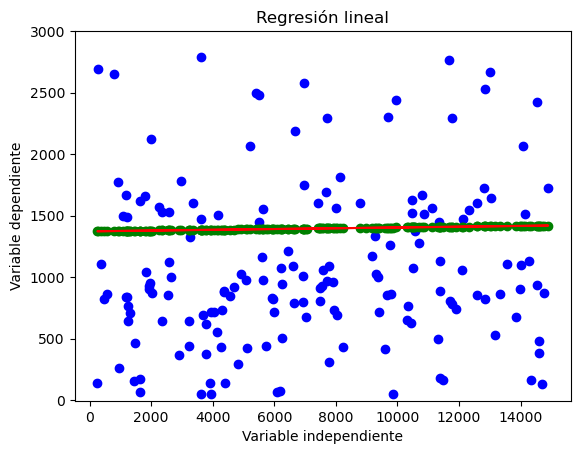

In [86]:
#De momento datos pre puestos pero, NECESITO QUE HAYA ALGO EN LA INTERFAZ QUE NOS PERMITA CAMBIAR LA COLONIA Y SU ALCALDIA
# PARA QUE EN LA INTERFAZ PODAMOS ESCOJER EL QUE SEA EN CUALQUIER MOMENTO
datos = diccionarioAlcaldias_Colonias['BENITO JUAREZ']
for colonia in datos:
    if colonia == "MODERNA":
        datosTransporte = diccionarioAlcaldias_Colonias['BENITO JUAREZ']['MODERNA'][0]
        datosConsumo = diccionarioAlcaldias_Colonias['BENITO JUAREZ']['MODERNA'][1]

print(datosConsumo)
print(datosTransporte)

X = np.array([datosTransporte]).reshape(-1,1)
Y = np.array(datosConsumo)

modelo = LinearRegression()

# Entrenar el modelo con los datos
modelo.fit(X, Y)

# Realizar predicciones
y_pred = modelo.predict(X)

# Visualizar los resultados
plt.scatter(X, Y, color='blue') 
plt.scatter(X, y_pred, color='green') # Datos originales
plt.plot(X, y_pred, color='red')  
plt.ylim(-5,3000)
plt.xlabel('Variable independiente')
plt.ylabel('Variable dependiente')
plt.title('Regresión lineal')
plt.show()
#hola


In [87]:
#Clasificacion
ArrayDatos = []
DatosY = []
for i in range(len(diccionarioAlcaldias_Colonias['BENITO JUAREZ']['MODERNA'][0])):
    DatosNuevosArray = [diccionarioAlcaldias_Colonias['BENITO JUAREZ']['MODERNA'][0][i], diccionarioAlcaldias_Colonias['BENITO JUAREZ']['MODERNA'][1][i]]
    ArrayDatos.append(DatosNuevosArray)

    Diferencia = diccionarioAlcaldias_Colonias['BENITO JUAREZ']['MODERNA'][0][i] - diccionarioAlcaldias_Colonias['BENITO JUAREZ']['MODERNA'][1][i]
    Prom = (diccionarioAlcaldias_Colonias['BENITO JUAREZ']['MODERNA'][0][i] + diccionarioAlcaldias_Colonias['BENITO JUAREZ']['MODERNA'][1][i])/2
    if Diferencia <= 0:
        DatosY.append(0)
    elif Diferencia >= Prom:
        DatosY.append(2)
    elif Diferencia < Prom:
        DatosY.append(1)


Xclasificacion = np.array(ArrayDatos)
YClasificacion = np.array(DatosY)

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(Xclasificacion, YClasificacion)

KNeighborsClassifier(n_neighbors=20)

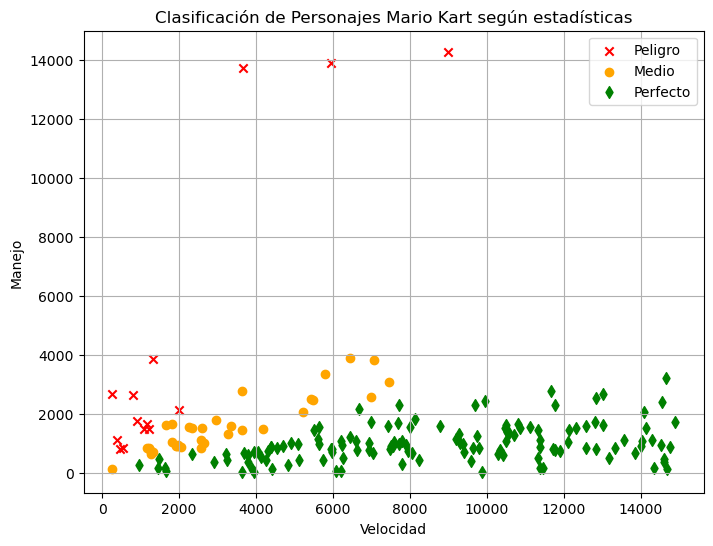

In [88]:
plt.figure(figsize=(8, 6))

# Graficar los datos de entrenamiento
plt.scatter(Xclasificacion[YClasificacion == 0][:, 0], Xclasificacion[YClasificacion == 0][:, 1], color='red', label='Peligro', marker='x')
plt.scatter(Xclasificacion[YClasificacion == 1][:, 0], Xclasificacion[YClasificacion == 1][:, 1], color='orange', label='Medio', marker='o')
plt.scatter(Xclasificacion[YClasificacion == 2][:, 0], Xclasificacion[YClasificacion == 2][:, 1], color='green', label='Perfecto', marker='d')

plt.xlabel('Velocidad')
plt.ylabel('Manejo')
plt.title('Clasificación de Personajes Mario Kart según estadísticas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import folium

# Carga el CSV desde tu ruta
df = pd.read_csv('datos/consumo_agua.csv')

# Crear el mapa
m = folium.Map(location=[19.4326, -99.1332], zoom_start=11)

# Agregar marcadores
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitud'], row['longitud']],
        radius=5,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f"Zona: {row['zona']}<br>Consumo: {row['consumo']} m³"
    ).add_to(m)

# Mostrar el mapa en el notebookl
m

ModuleNotFoundError: No module named 'folium'